#라이브러리 및 데이터 임포트

In [ ]:
## 필요한 라이브러리를 임포트합니다.

import pandas as pd
import numpy as np

In [ ]:
## 시각화 관련 라이브러리를 임포트합니다.

from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
## drive에 있는 데이터셋을 불러오기 위해 드라이브와 연동을 합니다.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## 'Marketing_campaign' 데이터의 위치를 불러와 저장합니다.

data = pd.read_csv('/content/drive/MyDrive/DSL/2023-1 과제/[0131][HW]_LinearRegression_and_SVM/econ.csv')
data = data[data['income']>0]
data

,gender,education,firmsize,worktype,workstart,age,union,incometype,income
183,1,0,1,1,202205,63,1,4,200
184,1,0,1,2,201201,73,1,4,100
185,1,0,1,2,201307,57,1,2,200
186,1,0,1,2,201612,79,1,4,180
187,1,0,1,2,201706,77,1,1,27
...,...,...,...,...,...,...,...,...,...
57379,2,7,6,1,202202,44,3,3,320
57380,2,7,6,1,202203,55,1,1,105
57381,2,7,6,2,201509,33,2,1,167
57382,2,7,6,2,201809,35,3,1,120


# 데이터 전처리

In [ ]:
#성별

data['gender'] = (data['gender']==1)

In [ ]:
#정규직 여부

data['regular'] = (data['worktype'] == 1)

In [ ]:
#노조 보호 여부

data['union'] = (data['union'] == 2) | (data['union'] == 3)

In [ ]:
#경력

data['workstart'] = data['workstart'].astype('str')
data['workstart'] = [x[:4] for x in data['workstart']]
data['workstart'] = data['workstart'].astype('int')
data['exp'] = 2022 - data['workstart']
data = data.drop(columns = 'workstart')  

In [ ]:
data['income'].describe()

count    25346.000000
mean       275.305847
std        180.735811
min          3.000000
25%        180.000000
50%        250.000000
75%        350.000000
max       3500.000000
Name: income, dtype: float64

In [ ]:
data = data[['gender',	'education',	'firmsize',	'regular',	'exp',	'age',	'union',	'income']]
data

,gender,education,firmsize,regular,exp,age,union,income
183,True,0,1,True,0,63,False,200
184,True,0,1,False,10,73,False,100
185,True,0,1,False,9,57,False,200
186,True,0,1,False,6,79,False,180
187,True,0,1,False,5,77,False,27
...,...,...,...,...,...,...,...,...
57379,False,7,6,True,0,44,True,320
57380,False,7,6,True,0,55,False,105
57381,False,7,6,False,7,33,True,167
57382,False,7,6,False,4,35,True,120


In [ ]:
data = data.astype('int')

# 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

scale_data = data.drop(columns = ['gender', 'regular', 'union'])
remaining_data = data[['gender', 'regular', 'union']]

scaler = StandardScaler()
scaler.fit(scale_data)
trans_data = scaler.transform(scale_data)

# numpy -> df
trans_data_df = pd.DataFrame(data=trans_data, columns=scale_data.columns)
trans_data_df = pd.concat([trans_data_df.reset_index(drop=True), remaining_data.reset_index(drop=True)], axis = 1)
trans_data_df # 0~1 사이의 값들을 가짐을 확인할 수 있다.

,education,firmsize,exp,age,income,gender,regular,union
0,-2.779516,-1.367150,-0.743113,1.050736,-0.416671,1,1,0
1,-2.779516,-1.367150,0.480174,1.725746,-0.969975,1,0,0
2,-2.779516,-1.367150,0.357845,0.645731,-0.416671,1,0,0
3,-2.779516,-1.367150,-0.009141,2.130751,-0.527332,1,0,0
4,-2.779516,-1.367150,-0.131470,1.995750,-1.373888,1,0,0
...,...,...,...,...,...,...,...,...
25341,2.340794,1.741972,-0.743113,-0.231782,0.247295,0,1,1
25342,2.340794,1.741972,-0.743113,0.510729,-0.942310,0,1,0
25343,2.340794,1.741972,0.113188,-0.974292,-0.599261,0,0,1
25344,2.340794,1.741972,-0.253799,-0.839290,-0.859315,0,0,1


In [ ]:
X = trans_data_df.drop(columns = 'income')
y = trans_data_df['income']

In [ ]:
X.head(3)

,education,firmsize,exp,age,gender,regular,union
0,-2.779516,-1.36715,-0.743113,1.050736,1,1,0
1,-2.779516,-1.36715,0.480174,1.725746,1,0,0
2,-2.779516,-1.36715,0.357845,0.645731,1,0,0


# 차원 축소 : LDA
주성분을 축으로 클러스터링하기 위함

In [ ]:
y_label = np.digitize(y, bins = [0.33, 0.66])
y_label

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## LDA
lda = LinearDiscriminantAnalysis(n_components = 2)
X_lda = lda.fit_transform(X, y_label)
X_lda = pd.DataFrame({'lda_1':X_lda[:, 0], 'lda_2':X_lda[:, 1]})
X_lda

,lda_1,lda_2
0,-1.609669,-1.555828
1,-0.768038,0.772661
2,-0.998965,0.239568
3,-1.070277,0.650068
4,-1.176910,0.518930
...,...,...
25341,0.768389,0.312645
25342,0.662747,0.328413
25343,1.156950,1.817055
25344,0.908076,1.653332


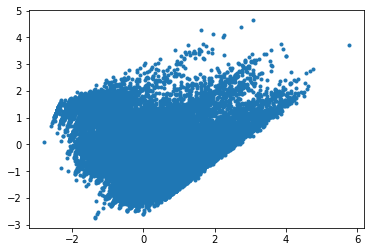

In [ ]:
plt.plot(X_lda['lda_1'], X_lda['lda_2'], '.')
plt.show()

# 임금 클러스터링

In [ ]:
## 필요한 라이브러리를 임포트합니다.

from sklearn.cluster import KMeans

In [ ]:
## 클러스터 수는 ########(숫자)########로 설정하고, KMeans를 활용하여 예측된 y값을 만들어 봅시다.

km = KMeans(n_clusters = 3)

X_km = km.fit_predict(X_lda)
X_km

array([2, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
X_lda['K_means'] = X_km

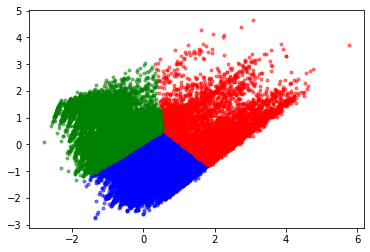

In [ ]:
plt.plot(X_lda[X_lda['K_means'] == 2]['lda_1'], X_lda[X_lda['K_means'] == 2]['lda_2'], '.', color = 'blue', alpha = 0.5)
plt.plot(X_lda[X_lda['K_means'] == 1]['lda_1'], X_lda[X_lda['K_means'] == 1]['lda_2'], '.', color = 'red', alpha = 0.5)
plt.plot(X_lda[X_lda['K_means'] == 0]['lda_1'], X_lda[X_lda['K_means'] == 0]['lda_2'], '.', color = 'green', alpha = 0.5)

In [ ]:
## 필요한 라이브러리를 임포트합니다.

import sklearn.metrics as metrics
from sklearn.metrics.cluster import silhouette_score

In [ ]:
coef_km = metrics.silhouette_score(X_lda.iloc[:, :2], X_km)
print('Silhouette score is {}.'.format(coef_km))

Silhouette score is 0.41275650310708245.


# 클러스터링 후 임금 회귀분석
클러스터된 각 근로자 집단 내에서의 회귀분석

In [ ]:
# 회귀(y값이 연속형변수)의 평가지표

from sklearn.metrics import mean_squared_error, mean_absolute_error

# MSE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    # MSE는 제곱이기에 값이 큼으로 r-MSE(root)를 이용한다.
    # MSE는 scikit-learn의 mean_squared_error()로 계산
    rmse_val = np.sqrt(mean_squared_error(y,pred))
    # MAE는 scikit-learn의 mean_absolute_error()로 계산
    mae_val = mean_absolute_error(y,pred)

    # (r-MSE & MAE)를 출력 후, 반환해주는 함수
    print('RMSE: {0:.3F}, MAE: {1:.3F}'.format(rmse_val, mae_val))
    return (rmse_val, mae_val)

RMSE: 0.722, MAE: 0.475


<BarContainer object of 2 artists>

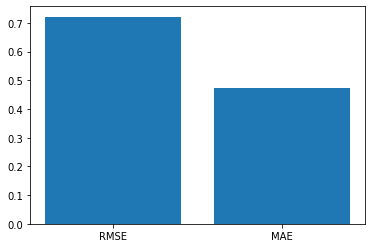

In [ ]:
#규제항과 스케일링 없이 실시

from sklearn.linear_model import LinearRegression

# Model
lr_model = LinearRegression()
lr_model.fit(X, y) # 최적화식을 풀어 학습파라미티(회귀계수)를 구한다.
pred = lr_model.predict(X) # 구한 회귀계수로 모델을 만들고, test_X로 test_y값을 예측한다.

result = evaluate_regr(y, pred) # 실제 값인 test_y과 예측값인 pred를 비교한다. 이 때, 회귀와 관련된 평가지표를 사용
plt.bar(['RMSE','MAE'], result)

In [ ]:
pd.DataFrame({'variables' : X.columns, 'coefficients':lr_model.coef_})

,variables,coefficients
0,education,0.208367
1,firmsize,0.158749
2,exp,0.314733
3,age,0.008943
4,gender,0.437460
5,regular,0.400056
6,union,0.088511


In [ ]:
X['K_means'] = X_km
X

,education,firmsize,exp,age,gender,regular,union,K_means
0,-2.779516,-1.367150,-0.743113,1.050736,1,1,0,2
1,-2.779516,-1.367150,0.480174,1.725746,1,0,0,1
2,-2.779516,-1.367150,0.357845,0.645731,1,0,0,1
3,-2.779516,-1.367150,-0.009141,2.130751,1,0,0,1
4,-2.779516,-1.367150,-0.131470,1.995750,1,0,0,1
...,...,...,...,...,...,...,...,...
25341,2.340794,1.741972,-0.743113,-0.231782,0,1,1,0
25342,2.340794,1.741972,-0.743113,0.510729,0,1,0,0
25343,2.340794,1.741972,0.113188,-0.974292,0,0,1,0
25344,2.340794,1.741972,-0.253799,-0.839290,0,0,1,0


In [ ]:
X_lda_df = X.copy()
X_lda_df['income'] = y
X_lda_df

,education,firmsize,exp,age,gender,regular,union,K_means,income
0,-2.779516,-1.367150,-0.743113,1.050736,1,1,0,2,-0.416671
1,-2.779516,-1.367150,0.480174,1.725746,1,0,0,1,-0.969975
2,-2.779516,-1.367150,0.357845,0.645731,1,0,0,1,-0.416671
3,-2.779516,-1.367150,-0.009141,2.130751,1,0,0,1,-0.527332
4,-2.779516,-1.367150,-0.131470,1.995750,1,0,0,1,-1.373888
...,...,...,...,...,...,...,...,...,...
25341,2.340794,1.741972,-0.743113,-0.231782,0,1,1,0,0.247295
25342,2.340794,1.741972,-0.743113,0.510729,0,1,0,0,-0.942310
25343,2.340794,1.741972,0.113188,-0.974292,0,0,1,0,-0.599261
25344,2.340794,1.741972,-0.253799,-0.839290,0,0,1,0,-0.859315


In [ ]:
X_lda_df.groupby('K_means')['income'].mean()

K_means
0    0.955662
1   -0.570855
2    0.159193
Name: income, dtype: float64

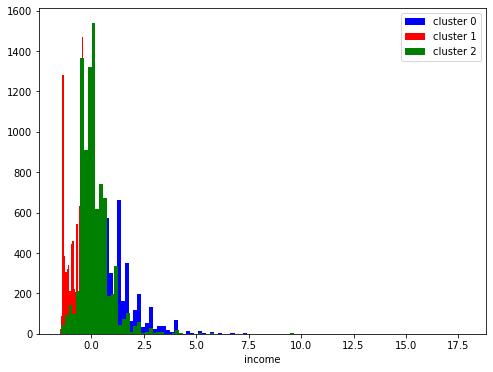

In [ ]:
plt.figure(figsize = (8,6))

plt.hist(X_lda_df[X_lda_df['K_means']==0]['income'], bins = 100, color = 'blue', label = 'cluster 0')
plt.hist(X_lda_df[X_lda_df['K_means']==1]['income'], bins = 100, color = 'red', label = 'cluster 1')
plt.hist(X_lda_df[X_lda_df['K_means']==2]['income'], bins = 100, color = 'green', label = 'cluster 2')
plt.legend()
plt.xlabel('income')

plt.show()

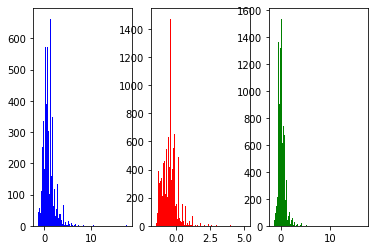

In [ ]:
plt.subplot(1,3,1)
plt.hist(X_lda_df[X_lda_df['K_means']==0]['income'], bins = 100, color = 'blue')
plt.subplot(1,3,2)
plt.hist(X_lda_df[X_lda_df['K_means']==1]['income'], bins = 100, color = 'red')
plt.subplot(1,3,3)
plt.hist(X_lda_df[X_lda_df['K_means']==2]['income'], bins = 100, color = 'green')
plt.show()


In [ ]:
X_0 = X_lda_df[X_lda_df['K_means']==0].drop(columns = ['income', 'K_means'])
y_0 = X_lda_df[X_lda_df['K_means']==0]['income']
X_1 = X_lda_df[X_lda_df['K_means']==1].drop(columns = ['income', 'K_means'])
y_1 = X_lda_df[X_lda_df['K_means']==1]['income']
X_2 = X_lda_df[X_lda_df['K_means']==2].drop(columns = ['income', 'K_means'])
y_2 = X_lda_df[X_lda_df['K_means']==2]['income']

In [ ]:
for i, X, y in zip([0,1,2], [X_0, X_1, X_2], [y_0, y_1, y_2]):
  lr_model = LinearRegression()
  lr_model.fit(X, y) # 최적화식을 풀어 학습파라미티(회귀계수)를 구한다.
  print('===========================================')
  print('OLS coefficients for {}th cluster'.format(i))
  print(pd.DataFrame({'variables' : X.columns, 'coefficients':lr_model.coef_}))


OLS coefficients for 0th cluster
   variables  coefficients
0  education      0.410864
1   firmsize      0.262187
2        exp      0.402213
3        age     -0.117661
4     gender      0.572651
5    regular      0.598050
6      union      0.155314
OLS coefficients for 1th cluster
   variables  coefficients
0  education      0.075356
1   firmsize      0.103153
2        exp      0.196408
3        age     -0.097875
4     gender      0.404471
5    regular      0.413352
6      union      0.013636
OLS coefficients for 2th cluster
   variables  coefficients
0  education      0.242868
1   firmsize      0.155499
2        exp      0.258963
3        age      0.095447
4     gender      0.389414
5    regular      0.475983
6      union     -0.047372
